# Storytelling Data Visualization on Exchange Rates

#### Table Of Contents
* [Introduction](#first-bullet)
* [Exploratory Data Analysis](#second-bullet)
* [Data Cleaning](#third-bullet)
* [Data Analysis](#4th-bullet)
* [Storytelling with Data Visualization](#5th-bullet)
* [Conclusion](#6th-bullet)

#### Introduction <a class="anchor" id="first-bullet"></a>

In this project, we explore and analyze Euro daily exchange rates from 1999 to 2021. 

The data was compiled by Daria Chemkaeva and is available on Kaggle, with the source being the European Central Bank.

#### Exploratory Data Analysis <a class="anchor" id="second-bullet"></a>

In [2]:
#Import Libraries
import pandas as pd
import matplotlib.style as style, matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [3]:
#Read in CSV dataset
exchange_rates = pd.read_csv("D:/DataQuest/euro-daily-hist_1999_2022.csv")

In [4]:
#Explore first 5 rows
print(exchange_rates.head(5))

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2023-12-15               1.6324           1.9558            5.4085   
1   2023-12-14               1.6288           1.9558            5.3349   
2   2023-12-13               1.6452           1.9558            5.3609   
3   2023-12-12               1.6398           1.9558            5.3327   
4   2023-12-11                1.642           1.9558            5.3169   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.4653         0.9488                   7.7812              NaN   
1             1.4677          0.949                   7.7866              NaN   
2             1.4644         0.9452                   7.7426              NaN   
3             1.4656         0.9443                   7.7447              NaN   
4             1.4609         0.9478                   7.7206              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

In [5]:
#Explore last 5 rows
print(exchange_rates.tail(5))

     Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
6451   1999-01-08               1.8406              NaN               NaN   
6452   1999-01-07               1.8474              NaN               NaN   
6453   1999-01-06               1.8820              NaN               NaN   
6454   1999-01-05               1.8944              NaN               NaN   
6455   1999-01-04               1.9100              NaN               NaN   

     [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ]  \
6451             1.7643         1.6138                      NaN   
6452             1.7602         1.6165                      NaN   
6453             1.7711         1.6116                      NaN   
6454             1.7965         1.6123                      NaN   
6455             1.8004         1.6168                      NaN   

     [Cypriot pound ] [Czech koruna ] [Danish krone ]  ... [Romanian leu ]  \
6451          0.58187          34.938          7.4433  .

In [6]:
#Overview of dataset
print(exchange_rates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6456 non-null   object 
 1   [Australian dollar ]      6456 non-null   object 
 2   [Bulgarian lev ]          6054 non-null   object 
 3   [Brazilian real ]         6188 non-null   object 
 4   [Canadian dollar ]        6456 non-null   object 
 5   [Swiss franc ]            6456 non-null   object 
 6   [Chinese yuan renminbi ]  6188 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6456 non-null   object 
 9   [Danish krone ]           6456 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6456 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6456 non-null   object 
 14  [Croatia

There are 6456 rows and 41 columns. The columns are different currencies and the rows are the exchange rates to EURO.

In [9]:
exchange_rates.columns

Index(['Period\Unit:', '[Australian dollar ]', '[Bulgarian lev ]',
       '[Brazilian real ]', '[Canadian dollar ]', '[Swiss franc ]',
       '[Chinese yuan renminbi ]', '[Cypriot pound ]', '[Czech koruna ]',
       '[Danish krone ]', '[Estonian kroon ]', '[UK pound sterling ]',
       '[Greek drachma ]', '[Hong Kong dollar ]', '[Croatian kuna ]',
       '[Hungarian forint ]', '[Indonesian rupiah ]', '[Israeli shekel ]',
       '[Indian rupee ]', '[Iceland krona ]', '[Japanese yen ]',
       '[Korean won ]', '[Lithuanian litas ]', '[Latvian lats ]',
       '[Maltese lira ]', '[Mexican peso ]', '[Malaysian ringgit ]',
       '[Norwegian krone ]', '[New Zealand dollar ]', '[Philippine peso ]',
       '[Polish zloty ]', '[Romanian leu ]', '[Russian rouble ]',
       '[Swedish krona ]', '[Singapore dollar ]', '[Slovenian tolar ]',
       '[Slovak koruna ]', '[Thai baht ]', '[Turkish lira ]', '[US dollar ]',
       '[South African rand ]'],
      dtype='object')

#### Data Cleaning <a class="anchor" id="third-bullet"></a>

We will focus on USD and EUROs in this project specifically so we will isolate them into a separate dataframe.

In [7]:
#Isolate the columns required in analysis
exchange_rates_USD = exchange_rates[['Period\\Unit:','[US dollar ]']].copy 

We rename the columns so it is easier to use.

In [8]:
#Rename Columns
exchange_rates_USD.rename(columns={'Period\\Unit:':'Time','[US dollar ]':'US_dollars'}, inplace=True)

We change time to datetime object.

In [9]:
#Change time from object datatype to datetime datatype
exchange_rates_USD['Time'] = pd.to_datetime(exchange_rates_USD['Time'])

In [10]:
exchange_rates_USD.reset_index(drop=True,inplace=True)

In [11]:
exchange_rates_USD['US_dollars'].value_counts()

US_dollars
-         62
1.2276     9
1.1215     8
1.0867     7
1.1268     7
          ..
1.4304     1
1.4273     1
1.4528     1
1.4481     1
1.1659     1
Name: count, Length: 3769, dtype: int64

Notice that there are rows with '-' as input for US-dollars column. We need to drop '-' rows before analysis.

In [12]:
#Drop '-' rows
exchange_rates_USD = exchange_rates_USD[exchange_rates_USD['US_dollars'] != '-']

Change USD from int to float.

In [13]:
#Change USD from int datatype to float datatype
exchange_rates_USD['US_dollars'] = exchange_rates_USD['US_dollars'].astype(float)

In [14]:
exchange_rates_USD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6394 entries, 0 to 6455
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time        6394 non-null   datetime64[ns]
 1   US_dollars  6394 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 149.9 KB


#### Data Analysis <a class="anchor" id="4th-bullet"></a>

We plot USD exchange rate against time to visualize the euro-USD exchange rate.

In [15]:
print(style.available)
style.use('seaborn-v0_8')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


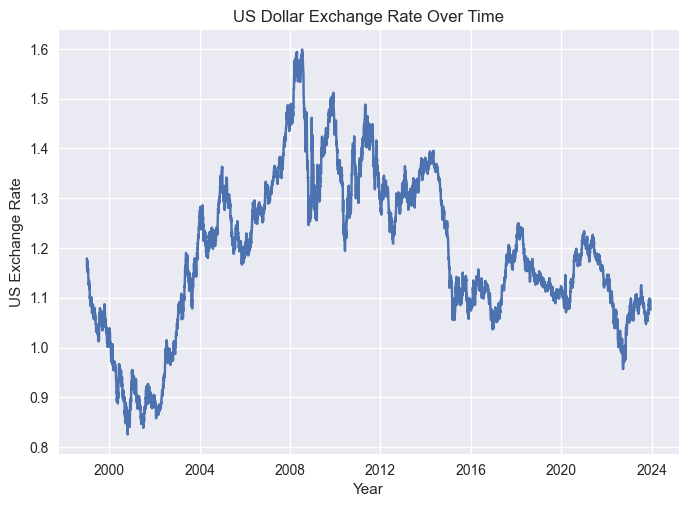

In [16]:
plt.plot(exchange_rates_USD['Time'],exchange_rates_USD['US_dollars'])
plt.title('US Dollar Exchange Rate Over Time')
plt.xlabel('Year')
plt.ylabel('US Exchange Rate')
plt.show()

Next we will take a look at the US Dollar Exchange rate using rolling mean of 30 days moving window.

In [18]:
#Create new column for rolling mean over 30-days window
exchange_rates_USD['rolling_mean_30d'] = exchange_rates_USD['US_dollars'].rolling(30).mean()

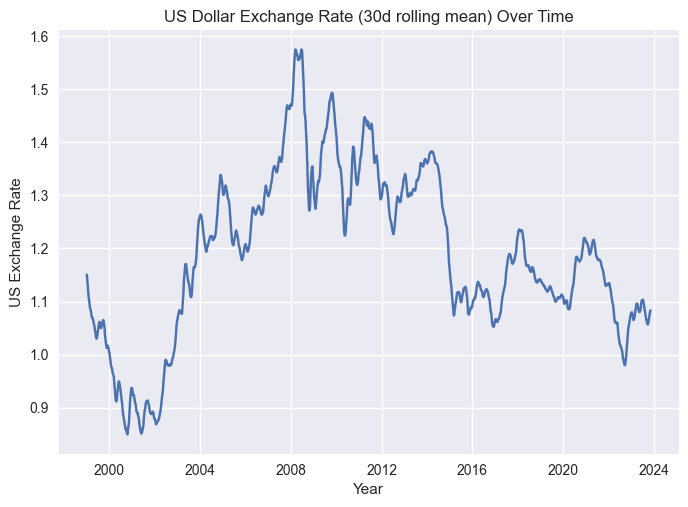

In [19]:
plt.plot(exchange_rates_USD['Time'],exchange_rates_USD['rolling_mean_30d'])
plt.title('US Dollar Exchange Rate (30d rolling mean) Over Time')
plt.xlabel('Year')
plt.ylabel('US Exchange Rate')
plt.show()

#### Storytelling with Data Visualization <a class="anchor" id="5th-bullet"></a>
Below we transform our data set into a visualization that will give us insight into the EURO-US Dollar Exchange Rates under different US Presidents from 2009 to 2024.

EURO-USD rates under presidents Barack Obama (2009-2017), Donald Trump (2017-2021), Joe Biden (2021-2024)

Let's create our datasets for the visualization.

In [20]:
the_rest = exchange_rates_USD[(exchange_rates_USD['Time'].dt.year < 2009) & (exchange_rates_USD['Time'].dt.year > 2007)]
barack_obama = exchange_rates_USD[(exchange_rates_USD['Time'].dt.year >= 2009) & (exchange_rates_USD['Time'].dt.year < 2017)]
donald_trump = exchange_rates_USD[(exchange_rates_USD['Time'].dt.year >= 2017) & (exchange_rates_USD['Time'].dt.year < 2021)]
joe_biden = exchange_rates_USD[exchange_rates_USD['Time'].dt.year >= 2021]

In [21]:
# Isolate the `years` of the financial crisis (2007 - 2009)
financial_crisis = exchange_rates_USD.copy()[(exchange_rates_USD['Time'].dt.year >= 2009) 
                                              & (exchange_rates_USD['Time'].dt.year < 2010)]

# Isolate the `years` of the European sovereign debt crisis (2015 - 2017)
eu_debt_crisis = exchange_rates_USD.copy()[(exchange_rates_USD['Time'].dt.year >= 2015) 
                                              & (exchange_rates_USD['Time'].dt.year < 2018)]

# Isolate the `years` of the 2019 global economic slowdown 
# and Covid-19 recession (2019 - 2020)
economic_slowdown_Covid = exchange_rates_USD.copy()[(exchange_rates_USD['Time'].dt.year >= 2019) 
                                              & (exchange_rates_USD['Time'].dt.year < 2021)]

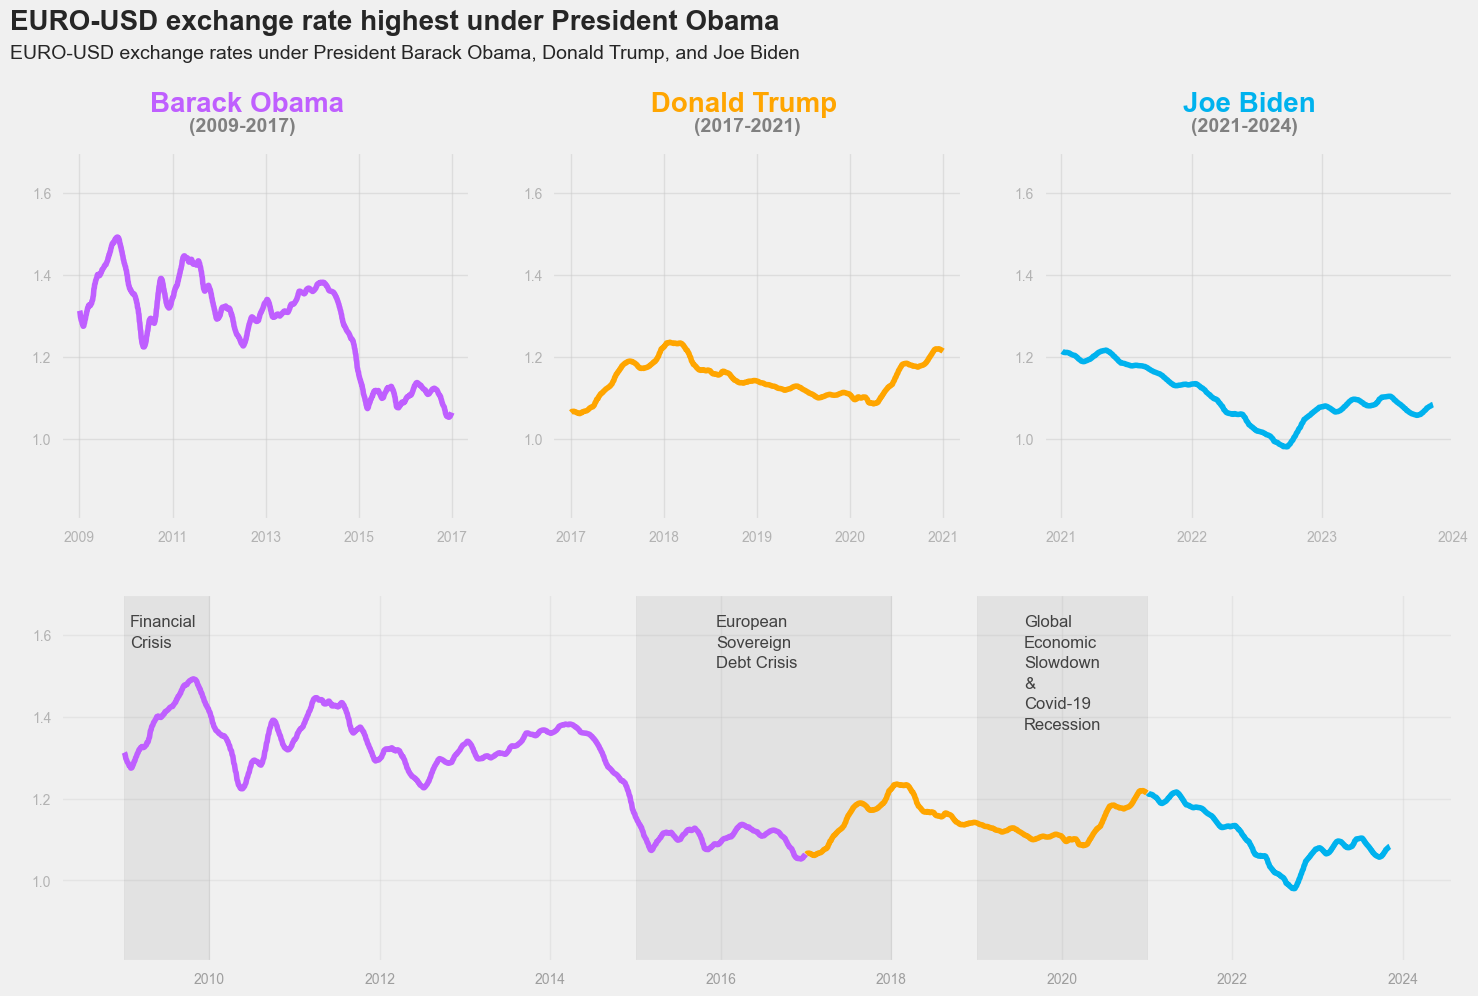

In [24]:
#Apply 538 style
style.use('fivethirtyeight')

#Create figure
plt.figure(figsize=(16,10))

#Assign subplot
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)

#Set up variables for plots 1-3
axes = [ax1,ax2,ax3]
sets = [barack_obama,donald_trump,joe_biden]
titles = ['Barack Obama',' Donald Trump','Joe Biden']
color = ['#BF5FFF', '#ffa500', '#00B2EE']
x_lab = [['2009','2011','2013','2015','2017'],['2017','2018','2019','2020','2021'],['2021','2022','2023','2024']]
dates = ['(2009-2017)','(2017-2021)','(2021-2024)']

#Coordinates from trial and error
coordinate = [14800, 17450, 18970]
sub_position = [15100, 17650, 18990]

#Create the plots 1-3 using variables above
for ax, x, c, x_label,title,title_position,date, sub in zip(axes, sets, color, x_lab, titles, coordinate, dates, sub_position):
    ax.plot(x['Time'],x['rolling_mean_30d'],color=c)
    ax.set_ylim([0.8,1.7])
    ax.set_yticks([1.0,1.2,1.4,1.6])
    ax.set_yticklabels(['1.0','1.2','1.4','1.6'], alpha=0.3)
    ax.set_xticks(x_label)
    ax.set_xticklabels(x_label, alpha=0.3)
    ax.text(title_position, 1.8, title, fontsize=20, weight='bold',color=c)
    ax.text(sub, 1.75, date, weight='bold',color='grey')
    ax.grid(alpha=0.5)

#Create plot 4
for x,c in zip(sets,color):
    ax4.plot(x['Time'],x['rolling_mean_30d'],color=c)
    ax4.set_ylim([0.8,1.7])
    ax4.set_yticks([1.0,1.2,1.4,1.6])
    ax4.set_yticklabels(['1.0','1.2','1.4','1.6'], alpha=0.3)

#Set Overall Title
ax1.text(13700, 2., 'EURO-USD exchange rate highest under President Obama', fontsize=20, weight='bold')
ax1.text(13700, 1.93, 'EURO-USD exchange rates under President Barack Obama, Donald Trump, and Joe Biden')

#Set Plot 4 Parameters
ax4.tick_params(colors='#9E9E9E', axis='x')
ax4.grid(alpha=0.3)

#Apply Shading for economic events
events = [financial_crisis, eu_debt_crisis, economic_slowdown_Covid]
for e in events:
    start_year = e['Time'].min()
    end_year = e['Time'].max()
    ax4.axvspan(xmin=start_year, xmax=end_year, ymin=0, ymax=1, alpha=0.12, color='grey')

#Apply Labelling, Coordinates based on trial and error    
ax4.text(x=14270, y=1.62, s='Financial', color='#424242', size=12)
ax4.text(x=14270, y=1.57, s='Crisis', color='#424242', size=12)

ax4.text(x=16780, y=1.62, s='European', color='#424242', size=12)
ax4.text(x=16780, y=1.57, s='Sovereign', color='#424242', size=12)
ax4.text(x=16780, y=1.52, s='Debt Crisis', color='#424242', size=12)

ax4.text(x=18100, y=1.62, s='Global', color='#424242', size=12)
ax4.text(x=18100, y=1.57, s='Economic', color='#424242', size=12)
ax4.text(x=18100, y=1.52, s='Slowdown', color='#424242', size=12)
ax4.text(x=18100, y=1.47, s='&', color='#424242', size=12)
ax4.text(x=18100, y=1.42, s='Covid-19', color='#424242', size=12)
ax4.text(x=18100, y=1.37, s='Recession', color='#424242', size=12)

plt.show()

The above visualization shows the EURO-US Dollar Exchange Rates under the three different US Presidents as well as the major economic events that have occurred during their presidencies.

#### Conclusion <a class="anchor" id="6th-bullet"></a>
In this project, we explored a dataset containing EURO exchange rates to different currencies. We cleaned the data and performed simple analysis of the dataset. More importantly, we created a simple line graph trending the EURO-US Dollar Exchange Rate vs year, and we transformed the graph to an effective visualization using principles of effective visuals - such as color and shading. We used distinct colors to differentiate separate presidencies and gray shading to differentiate economic events. This allows us to draw quick conclusions from the visual that may not be immediately obvious. For example, we can see how exchange rates peaked during the Financial Crisis and Covid-19 Recession and tapered shortly after. 
